In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, Input, Dense, Dropout, GlobalMaxPooling2D, Flatten
from tensorflow.keras.models import Model

Load the data

In [3]:
cifar10 = tf.keras.datasets.cifar10

(x_train , y_train) , (x_test,y_test) = cifar10.load_data()
x_train = x_train/255.0
x_test = x_test/255.0
y_train = y_train.flatten()
y_test = y_test.flatten()

K = len(set(y_train))

print("x_train shape = ", x_train.shape)
print("y_train shape = ",y_train.shape)
print("Total categories = ",K)

x_train shape =  (50000, 32, 32, 3)
y_train shape =  (50000,)
Total categories =  10


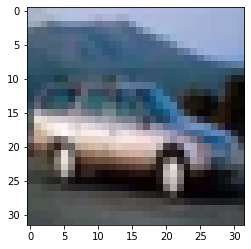

In [4]:
plt.imshow(x_train[4])

Build Model

In [6]:
i = Input(shape = x_train[0].shape)
x = Conv2D(32,(3,3),strides = 2,activation="relu")(i)
x = Conv2D(64,(3,3),strides = 2,activation="relu")(x)
x = Conv2D(128,(3,3),strides = 2,activation="relu")(x)
x = Flatten()(x)
# x = GlobalMaxPooling2D()(x)
x = Dropout(0.3)(x)
x = Dense(1024 , activation = "relu")(x)
x = Dropout(0.3)(x)
x = Dense(K , activation = "softmax")(x)


model = Model(i,x)

Model Compile and Fit

In [7]:
model.compile(optimizer = "adam" , 
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])

res = model.fit(x_train , y_train , validation_data = (x_test , y_test) , epochs = 15)

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 20s 397us/sample - loss: 1.5125 - acc: 0.4488 - val_loss: 1.2218 - val_acc: 0.5636
Epoch 2/15
50000/50000 [==============================] - 21s 417us/sample - loss: 1.2106 - acc: 0.5650 - val_loss: 1.1367 - val_acc: 0.5966
Epoch 3/15
50000/50000 [==============================] - 21s 424us/sample - loss: 1.0785 - acc: 0.6150 - val_loss: 1.0198 - val_acc: 0.6369
Epoch 4/15
50000/50000 [==============================] - 22s 432us/sample - loss: 0.9772 - acc: 0.6536 - val_loss: 0.9495 - val_acc: 0.6640
Epoch 5/15
50000/50000 [==============================] - 21s 428us/sample - loss: 0.8899 - acc: 0.6837 - val_loss: 0.9157 - val_acc: 0.6743
Epoch 6/15
50000/50000 [==============================] - 21s 424us/sample - loss: 0.8209 - acc: 0.7078 - val_loss: 0.8983 - val_acc: 0.6879
Epoch 7/15
50000/50000 [==============================] - 22s 433us/sample - loss: 0.7513 - acc: 0.7337 

Model Evaluation

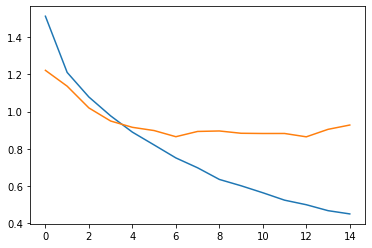

In [8]:

plt.plot(res.history["loss"] , label = "loss")
plt.plot(res.history["val_loss"] , label = "val_loss")
plt.show()

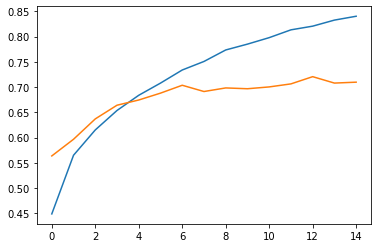

In [9]:
plt.plot(res.history["acc"] , label = "acc")
plt.plot(res.history["val_acc"] , label = "val_acc")
plt.show()